<a href="https://colab.research.google.com/github/ev1025/code-states-project/blob/main/%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%81%9D%EB%82%9C_%EC%9E%90%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

EDA, Feature Engineering, Data Manipulation, Data Visualization, Data
Wrangling   
Sprint 2   
Bayesian, Confidence Interval, Hypothesis Test, AB Test   
Sprint 3   
Linear Algebra, Dimensionality Reduction, PCA, Clustering, Gradient Descent   


Name : 게임의 이름입니다.    
Platform : 게임이 지원되는 플랫폼의 이름입니다    
Year : 게임이 출시된 연도입니다.    
Genre : 게임의 장르입니다.    
Publisher : 게임을 제작한 회사입니다.    
NA_Sales : 북미지역에서의 출고량입니다.   
EU_Sales : 유럽지역에서의 출고량입니다.    
JP_Sales : 일본지역에서의 출고량입니다.   
Other_Sales : 기타지역에서의 출고량입니다.    

In [ ]:
# from google.colab import files
# files.upload();

In [ ]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
rawdata = pd.read_csv('vgames2.csv')
df = pd.read_csv('vgames2.csv')
df = df.iloc[:,1:]

In [ ]:
rawdata.iloc[4765,3]

2003.0

In [ ]:
# df.info()

In [ ]:
# df[df.Year.isnull()] # 년도 결측값 확인

In [ ]:
# 판매량 데이터 높은 값만 수정
df.iat[6949,3] = 2004
df.iat[16275,3] = 1978
df.iat[13327,3] = 2001
df.iat[31,3] = 2007
df.iat[3347,3] = 2008
df.iat[3562,3] = 2006
df.iat[8529,3] = 2008
df.iat[4181,3] = 2007
df.iat[5720,3] = 1980
df.iat[2130,3] = 2006
df.iat[10965,3] = 2004

In [ ]:
df.dropna(axis=0, subset=['Year'],inplace=True) # 나머지 결측치
df.reset_index(inplace=True, drop= True)
df.Year = df.Year.astype(int)


In [ ]:
# df[df['Genre'].isnull()]

In [ ]:
# df.Genre.value_counts() # 장르종류

In [ ]:
# 판매량 높은 장르 결측값 등록
df.iat[1946,4] = 'Role-Playing' 
df.iat[9348,4] = 'Adventure'
df.iat[4523,4] = 'Misc'
df.iat[16316,4] = 'Racing'
df.iat[3871,4] = 'Sports'
df.iat[15268,4] = 'Role-Playing'
df.iat[12135,4] = 'Adventure'

In [ ]:
df.dropna(axis = 0 , subset=['Genre'], inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
# df[df['Publisher'].isna()]

In [ ]:
df.dropna(axis = 0 , subset=['Publisher'],inplace = True)  # Publisher 높은 사항없어서 다 제거
df.reset_index(inplace=True, drop=True)

In [ ]:
# df.duplicated().sum()

In [ ]:
# df.info()

In [ ]:
df.NA_Sales = df.NA_Sales.str.replace("M","").str.replace('K','000').astype(float) # 출고량의 M값과 K값 정리
K_index = df[df['NA_Sales'] >10]
K_index = K_index['NA_Sales']
K_1000 = K_index/1000000
df.loc[K_1000.index,'NA_Sales'] = K_1000
df['NA_Sales'] = round(df['NA_Sales'],2)

df.EU_Sales = df.EU_Sales.str.replace('M','').str.replace('K','000').astype(float)
K_index2 = df[df['EU_Sales']>10]
K_index2 = K_index2['EU_Sales']
K_2000 = K_index2/1000000
df.loc[K_2000.index,'EU_Sales'] = K_2000
df['EU_Sales'] = round(df['EU_Sales'],2)

df.JP_Sales = df.JP_Sales.str.replace('M','').str.replace('K','000').astype(float)
k_index3 = df[df['JP_Sales']>10]
k_index3 = k_index3['JP_Sales']
k_3000 = k_index3/1000000
df.loc[k_3000.index,'JP_Sales'] = k_3000
df['JP_Sales'] = round(df['JP_Sales'],2)

df.Other_Sales = df.Other_Sales.str.replace('M','').str.replace('K','000').astype(float)
k_index4 = df[df['Other_Sales'] >10]
k_index4 = k_index4['Other_Sales']
k_4000 = k_index4/1000000
df.loc[k_4000.index,'Other_Sales'] = k_4000
df.Other_Sales = round(df.Other_Sales,2)

In [ ]:
year_200 = df[df['Year']<10]
year_200 = year_200.astype(str)
y200 = '200'+year_200['Year']

year_20 = df[(df['Year']>=10) & (df['Year']<80) ]
year_20 = year_20.astype(str)
y20 = '20'+year_20['Year']

year19 = df[(df['Year']>=80) & (df['Year']<100) ]
year19 = year19.astype('str')
y19 = '19' + year19['Year']


In [ ]:
df.loc[y200.index,'Year'] = y200
df.loc[y20.index,'Year'] = y20
df.loc[y19.index,'Year']=y19
df.Year = df.Year.astype(int)

In [ ]:
Sales_sum = (df.loc[:,'NA_Sales']+df.loc[:,'EU_Sales']+df.loc[:,'JP_Sales']+df.loc[:,'Other_Sales']) 
df['Sales_sum'] = Sales_sum  # 출고량 합계

In [ ]:
# df.duplicated().sum()

In [ ]:
# df.Platform.value_counts()  
# 장르의 종류 및 개수 확인
# 휴대용 게임: WiiU DS 3DS PSP PSV GBA SAT GB NG SCD WS
# 콘솔 게임 : Wii PS PS2 PS3 PS4 XB X360 XOne GC N64 SNES NES 2600 DC GEN 3DO TG16 GG PCFX
# PC 게임 : PC

In [ ]:
hand  = ["WiiU", "DS", "3DS",  "PSP", "PSV", "GBA", "SAT", "GB", "NG", "SCD", "WS"]  

    df['Platform'] = df['Platform'].replace(i, "0")

consol = ["Wii", "PS", "PS2", "PS3", "PS4",  "XB",  "X360", "XOne", "GC", "N64", "SNES", "NES", "2600", "DC", "GEN", "3DO", "TG16", "GG", "PCFX"]
for j in consol:
    df['Platform'] = df['Platform'].replace(j,"1")
df['Platform'] = df['Platform'].replace('PC',"2")

df[df['Platform'].str.contains('([0-9])')==False] # 바뀌지 않은 것 있는지 확인

# 휴대용 : 0 , 콘솔 : 1 , PC : 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
portable = df.query('Platform == "0"')
consol = df.query('Platform == "1"')
pc = df.query('Platform == "2"')


portable = portable.iloc[:,[2,9]]

portable.set_index('Year')

,Sales_sum
Year,
2008,0.04
2010,0.02
2010,0.04
2005,0.14
2005,0.19
...,...
2012,0.03
2006,0.06
2007,0.02


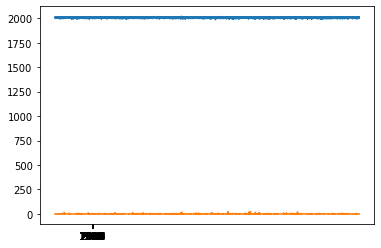

In [ ]:
plt.plot(portable)
plt.xticks(np.arange(1980,2020,1),np.arange(1980,2020,1))
plt.show();

In [ ]:
graph_data = pd.DataFrame(df, columns = ['Platform','Year','Sales_sum'])
dat = graph_data.groupby('Platform')
# sns.scatterplot(data = df, x=df['Year'],y=df['Platform'], hue = 'Platform')
# plt.legend()
# plt.show();

# drop_data = df[df['Platform'].str.contains('PCFX|GG|TG16|3DO|WS|SCD|NG')].index # 갯수 미만의 장르는 삭제

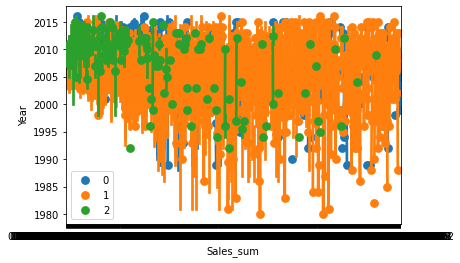

In [ ]:
sns.pointplot(data = graph_data, x='Sales_sum', y='Year',hue='Platform')
plt.legend()
plt.show();
# ['Potarble','Consol','PC']